# 1- Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('D:\Assignment 3\mercedes_benz_stock_refined.csv')

In [37]:
df.head(10)

,Date,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Day_of_Week,Month,Year,Quarter
0,1996-10-30,9.97,9.97,9.88,9.89,1640521,NaN,-0.08,0.09,9.89,9.89,9.89,NaN,Wednesday,10,1996,4
1,1996-10-31,9.91,10.02,9.91,10.02,1908031,1.34,0.11,0.11,9.95,9.95,9.95,NaN,Thursday,10,1996,4
2,1996-11-01,10.08,10.17,10.03,10.07,2423211,0.47,-0.01,0.14,9.99,9.99,9.99,0.61,Friday,11,1996,4
3,1996-11-04,10.08,10.17,10.08,10.14,1284644,0.78,0.07,0.09,10.03,10.03,10.03,0.44,Monday,11,1996,4
4,1996-11-05,10.19,10.34,10.14,10.34,2105206,1.88,0.15,0.20,10.09,10.09,10.09,0.62,Tuesday,11,1996,4
5,1996-11-06,10.39,10.49,10.36,10.49,2973859,1.53,0.10,0.14,10.16,10.16,10.16,0.57,Wednesday,11,1996,4
6,1996-11-07,10.49,10.50,10.31,10.44,2894508,-0.54,-0.05,0.20,10.20,10.20,10.20,0.87,Thursday,11,1996,4
7,1996-11-08,10.50,10.55,10.48,10.48,2001809,0.38,-0.02,0.07,10.28,10.23,10.23,0.82,Friday,11,1996,4
8,1996-11-11,10.47,10.53,10.46,10.52,1020742,0.45,0.05,0.06,10.35,10.26,10.26,0.77,Monday,11,1996,4
9,1996-11-12,10.51,10.76,10.47,10.76,2786903,2.27,0.25,0.29,10.45,10.31,10.31,0.88,Tuesday,11,1996,4


In [38]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Price', 'Volume', 'Daily_Return',
       'Price_Change', 'Price_Range', 'MA_7', 'MA_30', 'MA_90',
       'Volatility_30', 'Day_of_Week', 'Month', 'Year', 'Quarter'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7340 non-null   object 
 1   Open           7340 non-null   float64
 2   High           7340 non-null   float64
 3   Low            7340 non-null   float64
 4   Price          7340 non-null   float64
 5   Volume         7340 non-null   int64  
 6   Daily_Return   7339 non-null   float64
 7   Price_Change   7340 non-null   float64
 8   Price_Range    7340 non-null   float64
 9   MA_7           7340 non-null   float64
 10  MA_30          7340 non-null   float64
 11  MA_90          7340 non-null   float64
 12  Volatility_30  7338 non-null   float64
 13  Day_of_Week    7340 non-null   object 
 14  Month          7340 non-null   int64  
 15  Year           7340 non-null   int64  
 16  Quarter        7340 non-null   int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 97

# 2- Cleaning Data

In [40]:
df.isna().sum()

Date             0
Open             0
High             0
Low              0
Price            0
Volume           0
Daily_Return     1
Price_Change     0
Price_Range      0
MA_7             0
MA_30            0
MA_90            0
Volatility_30    2
Day_of_Week      0
Month            0
Year             0
Quarter          0
dtype: int64

In [55]:
df = df.fillna('Unknown')

In [42]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [43]:
numeric_cols = [
    'Open', 'High', 'Low', 'Price',
    'Volume', 'Daily_Return',
    'Price_Change', 'Price_Range',
    'MA_7', 'MA_30', 'MA_90',
    'Volatility_30',
    'Month', 'Year', 'Quarter'
]

for col in numeric_cols:
   df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
df['Price_Change'].dtype

dtype('float64')

In [45]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Price            float64
Volume             int64
Daily_Return     float64
Price_Change     float64
Price_Range      float64
MA_7             float64
MA_30            float64
MA_90            float64
Volatility_30    float64
Day_of_Week       object
Month              int64
Year               int64
Quarter            int64
dtype: object

In [46]:
df['Price_Change'] = df['Price_Change'].clip(lower=0)

In [47]:
df['Price_Change']

0       0.00
1       0.11
2       0.00
3       0.07
4       0.15
        ... 
7335    0.00
7336    0.00
7337    1.01
7338    0.00
7339    0.16
Name: Price_Change, Length: 7340, dtype: float64

In [48]:
df.duplicated().sum()

np.int64(0)

# 3- Exploring Data (Exploratory Data Analysis - EDA)

In [49]:
df.shape

(7340, 17)

In [50]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Price            float64
Volume             int64
Daily_Return     float64
Price_Change     float64
Price_Range      float64
MA_7             float64
MA_30            float64
MA_90            float64
Volatility_30    float64
Day_of_Week       object
Month              int64
Year               int64
Quarter            int64
dtype: object

In [51]:
df.describe()

,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Month,Year,Quarter
count,7340.000000,7340.000000,7340.000000,7340.000000,7.340000e+03,7339.000000,7340.000000,7340.000000,7340.000000,7340.000000,7340.000000,7338.000000,7340.000000,7340.000000,7340.000000
mean,24.367816,24.655711,24.059557,24.359046,5.590776e+06,0.047170,0.135531,0.596271,24.339554,24.263293,24.071390,1.927525,6.508992,2010.958311,2.504905
std,14.861018,14.991241,14.723266,14.859923,4.067521e+06,2.153144,0.256445,0.432967,14.837673,14.752034,14.538115,0.964567,3.442962,8.396848,1.118465
min,5.970000,6.140000,5.810000,5.890000,8.416000e+03,-18.850000,0.000000,0.000000,6.190000,6.770000,7.250000,0.440000,1.000000,1996.000000,1.000000
25%,12.980000,13.160000,12.800000,12.980000,3.032755e+06,-1.030000,0.000000,0.310000,12.990000,12.947500,12.857500,1.360000,3.000000,2004.000000,1.000000
50%,18.310000,18.610000,18.030000,18.295000,4.687026e+06,0.030000,0.000000,0.480000,18.275000,18.240000,18.140000,1.740000,7.000000,2011.000000,3.000000
75%,32.162500,32.410000,31.792500,32.112500,6.920106e+06,1.100000,0.180000,0.750000,32.030000,31.785000,31.992500,2.210000,9.000000,2018.000000,3.000000
max,65.660000,66.130000,64.850000,65.410000,7.396760e+07,27.280000,3.970000,5.390000,64.750000,63.520000,61.850000,8.270000,12.000000,2026.000000,4.000000


In [52]:
df['Day_of_Week'].nunique()

5

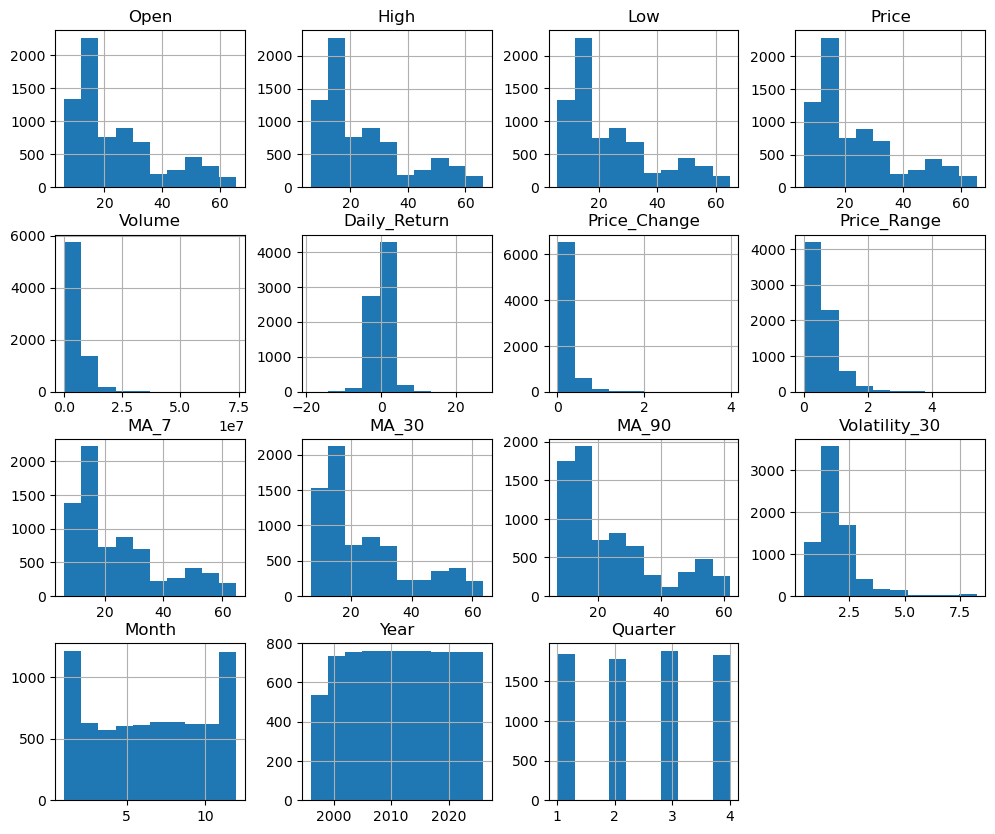

In [53]:
df.hist(figsize=(12,10))
plt.show()

In [56]:
df.head(10)

,Date,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Day_of_Week,Month,Year,Quarter
0,1996-10-30,9.97,9.97,9.88,9.89,1640521,Unknown,0.00,0.09,9.89,9.89,9.89,Unknown,Wednesday,10,1996,4
1,1996-10-31,9.91,10.02,9.91,10.02,1908031,1.34,0.11,0.11,9.95,9.95,9.95,Unknown,Thursday,10,1996,4
2,1996-11-01,10.08,10.17,10.03,10.07,2423211,0.47,0.00,0.14,9.99,9.99,9.99,0.61,Friday,11,1996,4
3,1996-11-04,10.08,10.17,10.08,10.14,1284644,0.78,0.07,0.09,10.03,10.03,10.03,0.44,Monday,11,1996,4
4,1996-11-05,10.19,10.34,10.14,10.34,2105206,1.88,0.15,0.20,10.09,10.09,10.09,0.62,Tuesday,11,1996,4
5,1996-11-06,10.39,10.49,10.36,10.49,2973859,1.53,0.10,0.14,10.16,10.16,10.16,0.57,Wednesday,11,1996,4
6,1996-11-07,10.49,10.50,10.31,10.44,2894508,-0.54,0.00,0.20,10.20,10.20,10.20,0.87,Thursday,11,1996,4
7,1996-11-08,10.50,10.55,10.48,10.48,2001809,0.38,0.00,0.07,10.28,10.23,10.23,0.82,Friday,11,1996,4
8,1996-11-11,10.47,10.53,10.46,10.52,1020742,0.45,0.05,0.06,10.35,10.26,10.26,0.77,Monday,11,1996,4
9,1996-11-12,10.51,10.76,10.47,10.76,2786903,2.27,0.25,0.29,10.45,10.31,10.31,0.88,Tuesday,11,1996,4


# 3- Feature Extraction

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [24]:
df[['Date','Year','Month']].head()

,Date,Year,Month
0,1996-10-30,1996,10
1,1996-10-31,1996,10
2,1996-11-01,1996,11
3,1996-11-04,1996,11
4,1996-11-05,1996,11


In [25]:
df["Revenue"] = df["Price"] * df["Volume"]
total_revenue = df["Revenue"].sum()
total_revenue

np.float64(840750018630.44)

In [57]:
df.head()

,Date,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Day_of_Week,Month,Year,Quarter
0,1996-10-30,9.97,9.97,9.88,9.89,1640521,Unknown,0.00,0.09,9.89,9.89,9.89,Unknown,Wednesday,10,1996,4
1,1996-10-31,9.91,10.02,9.91,10.02,1908031,1.34,0.11,0.11,9.95,9.95,9.95,Unknown,Thursday,10,1996,4
2,1996-11-01,10.08,10.17,10.03,10.07,2423211,0.47,0.00,0.14,9.99,9.99,9.99,0.61,Friday,11,1996,4
3,1996-11-04,10.08,10.17,10.08,10.14,1284644,0.78,0.07,0.09,10.03,10.03,10.03,0.44,Monday,11,1996,4
4,1996-11-05,10.19,10.34,10.14,10.34,2105206,1.88,0.15,0.20,10.09,10.09,10.09,0.62,Tuesday,11,1996,4


In [27]:
df["Total_Cost"] = df["Open"] * df["Volume"]
total_cost = df["Total_Cost"].sum()
total_cost

np.float64(841290433303.39)

In [28]:
df["Profit"] = df["Revenue"] - df["Total_Cost"]
total_profit = df["Profit"].sum()
total_profit

np.float64(-540414672.9500008)

In [29]:
conditions = [
    df["Profit"] > 0,
    df["Profit"] < 0,
    df["Profit"] == 0
]

choices = ["Positive", "Negative", "Break Even"]

df["Profit_Status"] = np.select(
    conditions,
    choices,
    default="Break Even"
)

In [58]:
df.head()

,Date,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Day_of_Week,Month,Year,Quarter
0,1996-10-30,9.97,9.97,9.88,9.89,1640521,Unknown,0.00,0.09,9.89,9.89,9.89,Unknown,Wednesday,10,1996,4
1,1996-10-31,9.91,10.02,9.91,10.02,1908031,1.34,0.11,0.11,9.95,9.95,9.95,Unknown,Thursday,10,1996,4
2,1996-11-01,10.08,10.17,10.03,10.07,2423211,0.47,0.00,0.14,9.99,9.99,9.99,0.61,Friday,11,1996,4
3,1996-11-04,10.08,10.17,10.08,10.14,1284644,0.78,0.07,0.09,10.03,10.03,10.03,0.44,Monday,11,1996,4
4,1996-11-05,10.19,10.34,10.14,10.34,2105206,1.88,0.15,0.20,10.09,10.09,10.09,0.62,Tuesday,11,1996,4


# 4- Data Analysis Using the Following Questions

1- 7340
2- 840750018630.44
3- 45.32
4- NaN
5- 66570835.5
6- NaN

In [31]:
highest_profit = df["Profit"].max()
highest_profit

66570835.5

In [32]:
sales_per_year = df.groupby("Year").size()
sales_per_year

Year
1996     39
1997    246
1998    251
1999    253
2000    240
2001    244
2002    247
2003    253
2004    257
2005    257
2006    253
2007    252
2008    251
2009    254
2010    256
2011    256
2012    253
2013    252
2014    252
2015    253
2016    255
2017    252
2018    251
2019    251
2020    254
2021    255
2022    246
2023    254
2024    250
2025    232
2026     21
dtype: int64

In [33]:
monthly_sales = df.groupby("Month")["Revenue"].sum().sort_values(ascending=False)
monthly_sales

Month
3     8.307746e+10
6     7.346590e+10
4     7.278632e+10
5     7.252389e+10
10    7.185052e+10
7     7.143290e+10
2     7.109833e+10
1     6.971728e+10
9     6.943163e+10
11    6.629588e+10
8     6.228062e+10
12    5.678928e+10
Name: Revenue, dtype: float64

In [34]:
monthly_sales.idxmax()

np.int32(3)

In [59]:
df.head()

,Date,Open,High,Low,Price,Volume,Daily_Return,Price_Change,Price_Range,MA_7,MA_30,MA_90,Volatility_30,Day_of_Week,Month,Year,Quarter
0,1996-10-30,9.97,9.97,9.88,9.89,1640521,Unknown,0.00,0.09,9.89,9.89,9.89,Unknown,Wednesday,10,1996,4
1,1996-10-31,9.91,10.02,9.91,10.02,1908031,1.34,0.11,0.11,9.95,9.95,9.95,Unknown,Thursday,10,1996,4
2,1996-11-01,10.08,10.17,10.03,10.07,2423211,0.47,0.00,0.14,9.99,9.99,9.99,0.61,Friday,11,1996,4
3,1996-11-04,10.08,10.17,10.08,10.14,1284644,0.78,0.07,0.09,10.03,10.03,10.03,0.44,Monday,11,1996,4
4,1996-11-05,10.19,10.34,10.14,10.34,2105206,1.88,0.15,0.20,10.09,10.09,10.09,0.62,Tuesday,11,1996,4
